Q1: The main purpose of this paper is to propose new and improved methods for creating common waveforms, such as the sawtooth, square, and triangle waves. The "classic" implementations of these wave typically have a lot of aliasing,
something can become a problem in the higher frequency range. These waves are all created using the differentiated parabolic waveform (DPW) algorithm, which aims to reduce this aliasing. Another benefit to these new algorithms is simpler computational time. To produce the square wave, you simply just need twice the time for computing a sawtooth wave. The algorithms used also actually improve upon the DPW algorithm by using a different differentiator. This alternate function helps to reduce undesired high frequencies. A secondary contribution in the paper is an improved Moog filter. This version has much less computational time and allows more freedom for the user in terms of frequency response modes. All of these contributions combined would be very useful for creating a retro-style synthesizer.

Q2: Figure 4a and 4b is a representation of the "classic" sawtooth wave (in the time domain and in the frequency
doman, respectively), 4c and 4d represents the squared version of that wave, adn 4e and 4f is the improved 
implementation from the paper. The main issue of the normal sawooth wave is the presence of aliasing. This becomes
a major issue at higher frequencies when the harmonics are very close to the aliasing components, causing an 
undesired beating in the wave.

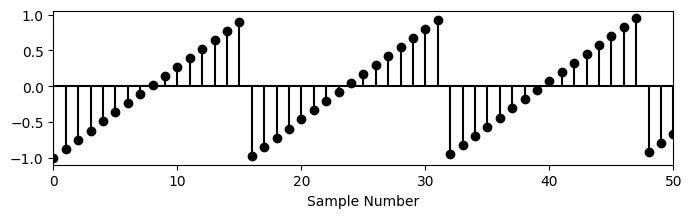

In [2]:
# Q3: Replication of 4a using pyplot and a basic sawtooth wave signal

from scipy import signal
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

srate = 44100

def plot(data_list): 
    fig, ax = plt.subplots(figsize=(8,2))
    for data in data_list: 
        plt.stem(data, 'ko', basefmt='k-')
        plt.xlim(0, 50)
    plt.xlabel('Sample Number')

def sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data

data = sawtooth(freq = 2793.8, dur = 3.0)

plot([data[0:51]])

ipd.Audio(data, rate = srate)

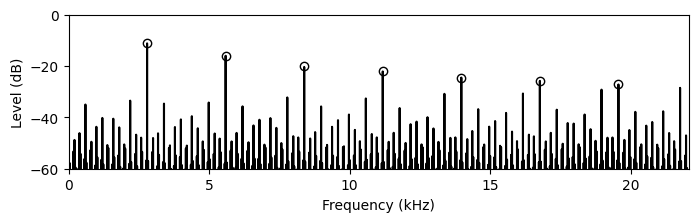

In [3]:
# Q4: Replication of 4b using pyplot and a basic sawtooth wave signal with magnitude_spectrum()

srate = 44100

def plot(data_list): 
    fig, ax = plt.subplots(figsize=(8,8))
    for data in data_list: 
        plt.stem(data, 'ko', basefmt='k-')
        #plt.xlim(0, 50)
    plt.xlabel('Sample Number')

def sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data

data = sawtooth(freq = 2793.8, dur = 3.0)

plt.subplots(figsize=(8,2))
plt.magnitude_spectrum(data, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -11, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(5.5876, -16, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -20, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(11.1752, -22, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -24.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(16.7628, -26, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -27, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

ipd.Audio(data, rate = srate)

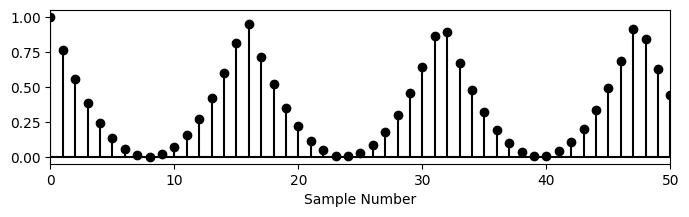

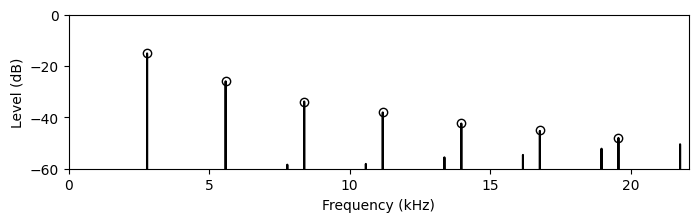

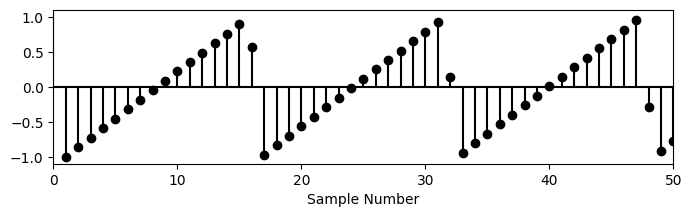

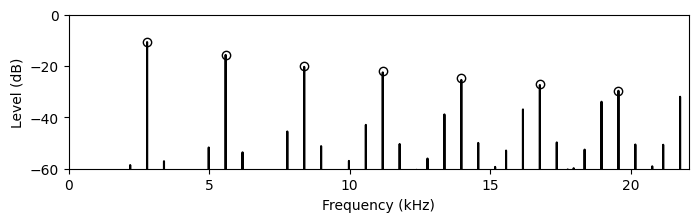

In [4]:
# Q6: 

from scipy import signal
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

srate = 44100

def plot(data_list): 
    fig, ax = plt.subplots(figsize=(8,2))
    for data in data_list: 
        plt.stem(data, 'ko', basefmt='k-')
        plt.xlim(0, 50)
    plt.xlabel('Sample Number')

def sq_sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data ** 2

data_st = sq_sawtooth(freq = 2793.8, dur = 3.0)

plot([data_st[0:51]])

plt.subplots(figsize=(8,2))
plt.magnitude_spectrum(data_st, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -15, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(5.5876, -26, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -34, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(11.1752, -38, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -42, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(16.7628, -45, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -48, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

# New Saw

data_newsaw = signal.lfilter([1,-1], 1, data_st)
data_newsaw = data_newsaw * (srate / (4 * 2793.8 * (1 - (2793.8 / srate))))
plot([data_newsaw[0:51]])
plt.ylim(-1.1, 1.1)

plt.subplots(figsize=(8,2))
plt.magnitude_spectrum(data_newsaw, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -10.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(5.5876, -15.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -20, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(11.1752, -22, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -24.75, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(16.7628, -27, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -29.75, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)


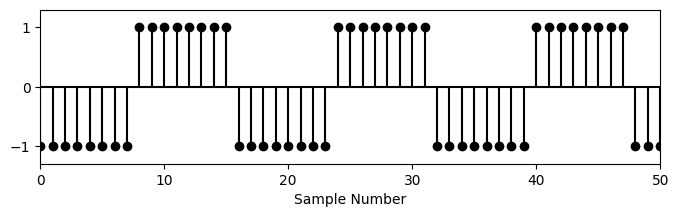

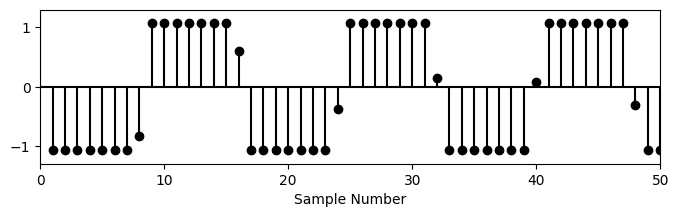

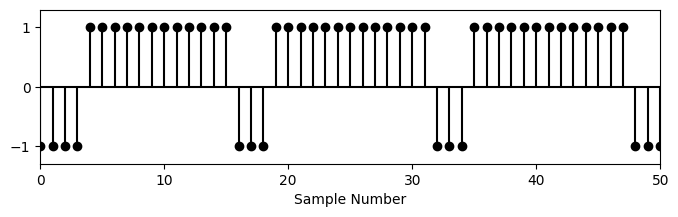

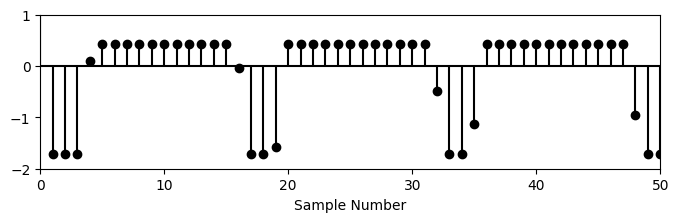

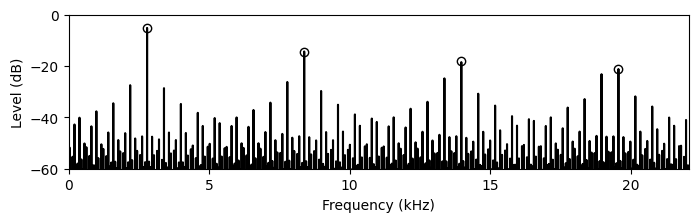

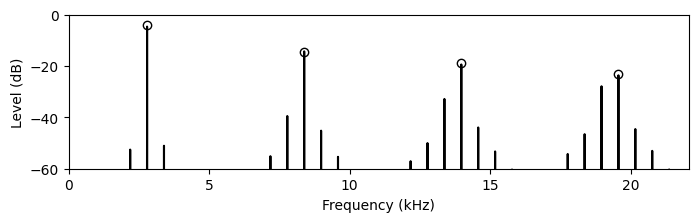

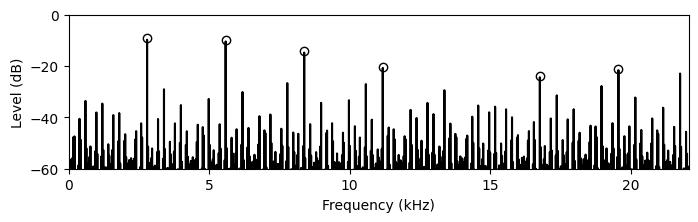

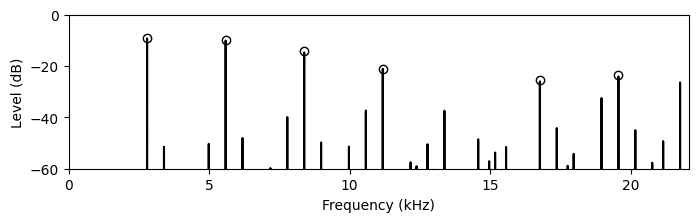

In [25]:
# Q6: Square wave is made by subtracting a saw wave and a pi shifted saw wave. The 20% duty cycle is done the same 
# way but with a shift of 0.8 * 2pi, or 1.6 * pi

from scipy import signal
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

srate = 44100

def plot(data_list): 
    fig, ax = plt.subplots(figsize=(8,2))
    for data in data_list: 
        plt.stem(data, 'ko', basefmt='k-')
        plt.xlim(0, 50)
        plt.ylim(-1.3, 1.3)
    plt.xlabel('Sample Number')

def sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data

def square(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0, duty = 0.5): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.square((2 * np.pi * freq * t + phase), duty)
    return data

def new_sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    data = data ** 2
    data_newsaw = signal.lfilter([1,-1], 1, data)
    data_newsaw = data_newsaw * (srate / (4 * 2793.8 * (1 - (2793.8 / srate))))
    return data_newsaw


data_st = new_sawtooth(freq = 2793.8, dur = 3.0)
data_st_shift = new_sawtooth(freq = 2793.8, dur = 3.0, phase = np.pi)
data_newsq = data_st - data_st_shift

data_sq = square(freq = 2793.8, dur = 3.0, amp = -1)

plot([data_sq[0:51]]) # Fig 8a
plot([data_newsq[0:51]]) # Fig 8b

# 20% Duty Cycle

data_st2 = new_sawtooth(freq = 2793.8, dur = 3.0)
data_st_shift2 = new_sawtooth(freq = 2793.8, dur = 3.0, phase = 1.6 * np.pi)
data_newsq2 = data_st2 - data_st_shift2

data_sq2 = square(freq = 2793.8, dur = 3.0, amp = -1, duty = 0.2)

plot([data_sq2[0:51]]) # Fig 8c
plot([data_newsq2[0:51]]) # Fig 8d
plt.ylim(-2, 1)

# Magnitude Plots

plt.subplots(figsize=(8,2)) # Fig 9a
plt.magnitude_spectrum(data_sq, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -14.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -18, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -21, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

plt.subplots(figsize=(8,2)) #fig 9b
plt.magnitude_spectrum(data_newsq, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -4, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -14.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -19, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -23, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

plt.subplots(figsize=(8,2)) #fig 9c
plt.magnitude_spectrum(data_sq2, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(5.5876, -10, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -14, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(11.1752, -20.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(16.7628, -24, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -21, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

plt.subplots(figsize=(8,2)) #fig 9d
plt.magnitude_spectrum(data_newsq2, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(5.5876, -10, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -14, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(11.1752, -21, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(16.7628, -25.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -23.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-60, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)



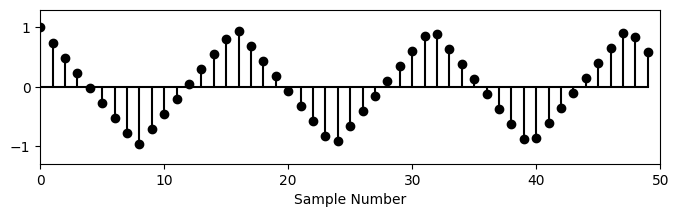

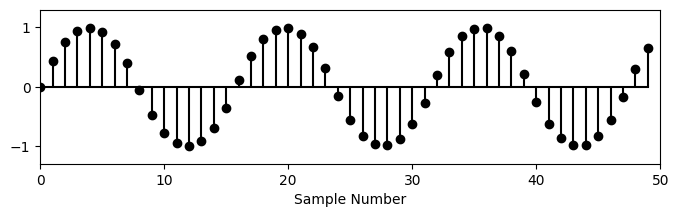

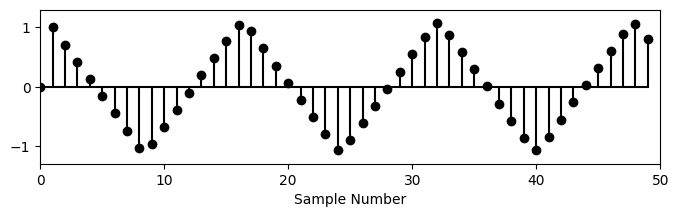

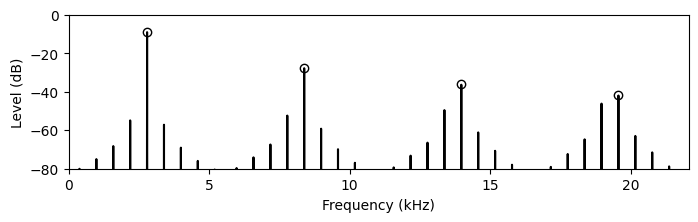

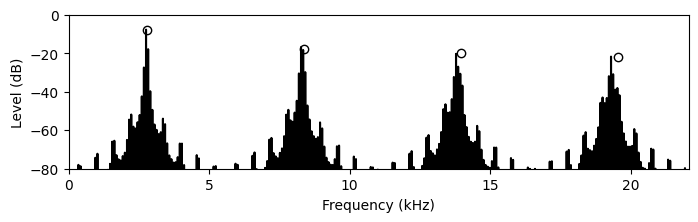

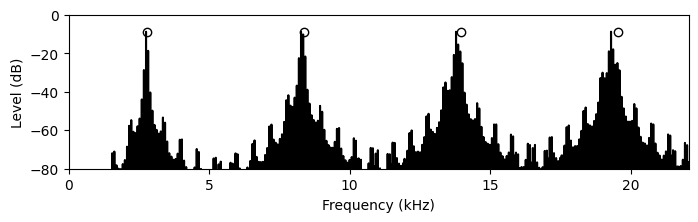

In [36]:
# Q7: Implementation of new triangle wave. The counter function flips the square wave every period to phase align
# it with the squared sawtooth wave. The resulting piecewise wave is scaled and differentiated to get the triangle

from scipy import signal
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

srate = 44100

def plot(data_list): 
    fig, ax = plt.subplots(figsize=(8,2))
    for data in data_list: 
        plt.stem(data, 'ko', basefmt='k-')
        plt.xlim(0, 50)
        plt.ylim(-1.3, 1.3)
    plt.xlabel('Sample Number')

def squared_sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data ** 2

def square(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0, duty = 0.5): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.square((2 * np.pi * freq * t + phase), duty)
    return data

def new_sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    data = data ** 2
    data_newsaw = signal.lfilter([1,-1], 1, data)
    data_newsaw = data_newsaw * (srate / (4 * 2793.8 * (1 - (2793.8 / srate))))
    return data_newsaw

def triangle(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase, 0.5)
    return data

def mod_counter(data):
    multsign = 1
    count = 0
    index = 0
    data_flip = []
    for point in data:
        if count % 8 == 0:
            multsign *= -1
        new_point = -1 * multsign
        data_flip.append(new_point)
        count += 1
        index += 1
    return data_flip

data_tr = triangle(2793.8, dur = 3.0, amp = -1)

data_bimod = squared_sawtooth(freq = 2 * 2793.8, dur = 3.0)
data_bimod = 1 - data_bimod
data_modsquare = square(freq = 2 * 2793.8, dur = 3.0, amp = 1)
data_flipsquare = mod_counter(data_modsquare)

data_piecewise = data_bimod * data_flipsquare

data_newtr = signal.lfilter([1,-1], 1, data_piecewise)
data_newtr = data_newtr * (srate / (4 * (2 * 2793.8) * (1 - ((2 * 2793.8) / srate))))


plot([data_tr[0:50]]) # Fig 12a
#plot([data_bimod[0:50]])
#plot([data_flipsquare[0:50]])
plot([data_piecewise[0:50]]) # Fig 12b
plot([data_newtr[0:50]]) # Fig 12c

# Magnitude Plots

plt.subplots(figsize=(8,2)) # Fig 13a
plt.magnitude_spectrum(data_tr, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -27.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -36, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -41.5, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-80, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

plt.subplots(figsize=(8,2)) # Fig 13b
plt.magnitude_spectrum(data_piecewise, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -8, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -18, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -20, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -22, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-80, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

plt.subplots(figsize=(8,2)) # Fig 13c
plt.magnitude_spectrum(data_newtr, scale='dB', Fs = srate/1000, color = 'black')
plt.plot(2.7938, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(8.3814, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(13.969, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.plot(19.5566, -9, 'o', markerfacecolor='none', markeredgecolor='k')
plt.xlim(0, 22.05)
plt.ylim(-80, 0)
plt.ylabel('Level (dB)')
plt.xlabel('Frequency (kHz)')
plt.locator_params(axis='x', nbins=5)

ipd.Audio(data_newtr, rate = srate)



In [29]:
# Q8: A series of versions of the same melody to compare the different waves.

def mod_counter(data):
    multsign = 1
    count = 0
    index = 0
    data_flip = []
    for point in data:
        if count % 8 == 0:
            multsign *= -1
        new_point = -1 * multsign
        data_flip.append(new_point)
        count += 1
        index += 1
    return data_flip

def sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data

def square(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0, duty = 0.5): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.square((2 * np.pi * freq * t + phase), duty)
    return data

def triangle(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase, 0.5)
    return data

def new_sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    data = data ** 2
    data_newsaw = signal.lfilter([1,-1], 1, data)
    data_newsaw = data_newsaw * (srate / (4 * freq * (1 - (freq / srate))))
    return data_newsaw

def new_square(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0, duty = 0.5): 
    data_st = new_sawtooth(freq = freq, dur = dur)
    data_st_shift = new_sawtooth(freq, dur = dur, phase = 2 * (1 - duty) * np.pi)
    data_newsq = data_st - data_st_shift
    return data_newsq

def new_triangle(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    data_bimod = (sawtooth(freq = 2 * freq, dur = dur) ** 2)
    data_bimod = 1 - data_bimod
    data_modsquare = square(freq = 2 * freq, dur = dur, amp = 1)
    data_flipsquare = mod_counter(data_modsquare)
    data_piecewise = data_bimod * data_flipsquare
    data_newtr = signal.lfilter([1,-1], 1, data_piecewise)
    data_newtr = data_newtr * (srate / (4 * (2 * freq) * (1 - ((2 * freq) / srate))))
    return data_newtr

a_data = sawtooth(freq = 146.83, dur = 0.25)
b_data = sawtooth(freq = 164.81, dur = 0.25)
c_data = sawtooth(freq = 174.61, dur = 0.25)
d_data = sawtooth(freq = 196.00, dur = 0.25)
e_data = sawtooth(freq = 164.81, dur = 0.50)
f_data = sawtooth(freq = 130.81, dur = 0.25)
g_data = sawtooth(freq = 146.83, dur = 0.50)

st_data1 = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])

ipd.Audio(st_data1, rate = srate)

In [30]:
a_data = new_sawtooth(freq = 146.83, dur = 0.25)
b_data = new_sawtooth(freq = 164.81, dur = 0.25)
c_data = new_sawtooth(freq = 174.61, dur = 0.25)
d_data = new_sawtooth(freq = 196.00, dur = 0.25)
e_data = new_sawtooth(freq = 164.81, dur = 0.50)
f_data = new_sawtooth(freq = 130.81, dur = 0.25)
g_data = new_sawtooth(freq = 146.83, dur = 0.50)

st_data2 = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])

ipd.Audio(st_data2, rate = srate)

In [31]:
a_data = square(freq = 146.83, dur = 0.25, duty = 0.2)
b_data = square(freq = 164.81, dur = 0.25, duty = 0.3)
c_data = square(freq = 174.61, dur = 0.25, duty = 0.4)
d_data = square(freq = 196.00, dur = 0.25, duty = 0.5)
e_data = square(freq = 164.81, dur = 0.50, duty = 0.6)
f_data = square(freq = 130.81, dur = 0.25, duty = 0.7)
g_data = square(freq = 146.83, dur = 0.50, duty = 0.8)

sq_data1 = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])


ipd.Audio(sq_data1, rate = srate)

In [32]:
a_data = new_square(freq = 146.83, dur = 0.25, duty = 0.2)
b_data = new_square(freq = 164.81, dur = 0.25, duty = 0.3)
c_data = new_square(freq = 174.61, dur = 0.25, duty = 0.4)
d_data = new_square(freq = 196.00, dur = 0.25, duty = 0.5)
e_data = new_square(freq = 164.81, dur = 0.50, duty = 0.6)
f_data = new_square(freq = 130.81, dur = 0.25, duty = 0.7)
g_data = new_square(freq = 146.83, dur = 0.50, duty = 0.8)

sq_data2 = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])

ipd.Audio(sq_data2, rate = srate)

In [33]:
a_data = triangle(freq = 146.83, dur = 0.25)
b_data = triangle(freq = 164.81, dur = 0.25)
c_data = triangle(freq = 174.61, dur = 0.25)
d_data = triangle(freq = 196.00, dur = 0.25)
e_data = triangle(freq = 164.81, dur = 0.50)
f_data = triangle(freq = 130.81, dur = 0.25)
g_data = triangle(freq = 146.83, dur = 0.50)

tr_data1 = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])

ipd.Audio(tr_data1, rate = srate)

In [34]:
a_data = new_triangle(freq = 146.83, dur = 0.25)
b_data = new_triangle(freq = 164.81, dur = 0.25)
c_data = new_triangle(freq = 174.61, dur = 0.25)
d_data = new_triangle(freq = 196.00, dur = 0.25)
e_data = new_triangle(freq = 164.81, dur = 0.50)
f_data = new_triangle(freq = 130.81, dur = 0.25)
g_data = new_triangle(freq = 146.83, dur = 0.50)

tr_data2 = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])

ipd.Audio(tr_data2, rate = srate)